# 2020a_4DVARSW
This notebook, associated to the configuration file *config_2022a_4DVARSW_dev.py*.

## Configuration file

In [1]:
path_config = 'config_2022a_4DVARSW_dev'

In [2]:
import sys
dir_massh = '/home/bellemva/MASSH/mapping'
sys.path.append(dir_massh)

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: config_hawaii_generation
saveoutputs: True
name_exp_save: config_hawaii_generation
path_save: ../outputs/config_hawaii_generation
tmp_DA_path: ../scratch/config_hawaii_generation
init_date: 2012-06-05 00:00:00
final_date: 2012-06-10 00:00:00
assimilation_time_step: 1:00:00
saveoutput_time_step: 1:00:00
flag_plot: 4
write_obs: True
path_obs: ../obs/2022a_4DVARQG
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False

NAME_BC is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: 185.0
lon_max: 205
lat_min: 15.0
lat_max: 35.0
dlon: 0.08333333333333333
dlat: 0.08333333333333333
name_init_mask: ./mask/mask_test.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mask'}



In [5]:
State.nx

242

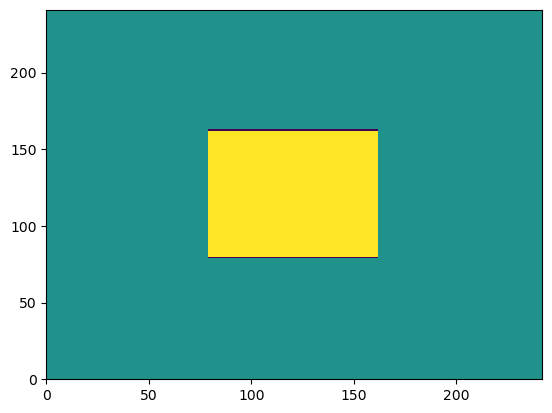

In [7]:
import matplotlib.pyplot as plt
plt.pcolormesh(State.mask_int['v'],vmin=0,vmax=2)

## Model

In [ ]:
from src import mod as mod
Model = mod.Model(config,State)

In [ ]:
State.plot()

In [ ]:
from src import bc as bc
Bc = bc.Bc(config)

## Observations

In [ ]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

In [ ]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

## Reduced Basis

In [ ]:
from src import basis as basis
Basis = basis.Basis(config, State)

## Assimilation

In [ ]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

## Diagnostics

In [ ]:
from src import diag as diag
Diag = diag.Diag(config,State)

In [ ]:
Diag.regrid_exp()
Diag.exp_regridded.ssh[-1].plot()

In [ ]:
Diag.rmse_based_scores(plot=True)

In [ ]:
Diag.psd_based_scores(plot=True)

In [ ]:
Diag.movie(framerate=12,clim=(0,.5),range_err=.2)

In [ ]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [ ]:
Leaderboard = Diag.Leaderboard()
Leaderboard